In [1]:
# import libraries
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set maximum number of rows to display from a pandas data frame
pd.set_option('display.max_rows', 3000)

In [3]:
#create dataframe for results of settlement calculations
settlements_df = pd.DataFrame()

# import cataFrame with calculated results from Tunnel GIS
align_data_df = pd.read_csv('Ostroehre.TunnelExcavationData.R2.csv',index_col=0)

align_data_df

,Station,Easting,Northing,Elevation,DTM,RockSurface,StationReal,RockCover,WBScode,WorkType,...,ProfileType,SectionArea,Description,Unit,BoreClass,SupportClass,DisposalClass,StationInterval,ExcavationVolume,DisposalVolume
0,204+874.1,2612071.548,1269294.122,270.962,253.524,236.000,204874.100,-34.962,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,1.900828,NaN,NaN
1,204+876,2612072.991,1269295.359,270.989,253.612,236.000,204876.000,-34.989,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,2.999867,NaN,NaN
2,204+879,2612075.303,1269297.270,271.033,253.160,236.000,204879.000,-35.033,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,2.999841,NaN,NaN
3,204+882,2612077.657,1269299.129,271.076,253.160,235.815,204882.000,-35.261,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,3.000535,NaN,NaN
4,204+885,2612080.052,1269300.936,271.120,252.934,235.815,204885.000,-35.305,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,3.000680,NaN,NaN
5,204+888,2612082.487,1269302.689,271.163,252.934,235.815,204888.000,-35.348,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,2.999887,NaN,NaN
6,204+891,2612084.959,1269304.388,271.207,252.934,235.815,204891.000,-35.392,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,3.000233,NaN,NaN
7,204+894,2612087.469,1269306.031,271.250,252.574,235.815,204894.000,-35.435,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,3.000117,NaN,NaN
8,204+897,2612090.014,1269307.619,271.294,252.013,235.815,204897.000,-35.479,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,3.000368,NaN,NaN
9,204+900,2612092.594,1269309.150,271.337,252.013,235.707,204900.000,-35.630,1,NaN,...,NaN,NaN,highway,m3,NaN,NaN,NaN,3.000777,NaN,NaN


In [4]:
#len(align_data_df.index)
len(align_data_df)  #includes header and 1 blank line ???
#align_data_df.count()

1593

In [5]:
# calculate settlements at stationed points along tunnel alignment
for i in range(len(align_data_df.index) - 3): #start loop over rows (=points) in align_data_df
    # read values which are needed for calculation of point i into a numpy array
    pt_a = array( [align_data_df['Easting'][i], align_data_df['Northing'][i], align_data_df['Elevation'][i], 
                   align_data_df['DTM'][i], align_data_df['RockCover'][i]] )
    pt_a = asfarray(pt_a,float)  #return an array converted to a float type
    stat = align_data_df['Station'][i]
    # read in the values which are needed for calculation of point i+1
    pt_b = array( [align_data_df['Easting'][i+1], align_data_df['Northing'][i+1], align_data_df['Elevation'][i+1],
                   align_data_df['DTM'][i+1], align_data_df['RockCover'][i+1]] )
    pt_b=asfarray(pt_b,float)
    d = pt_a[3] - pt_a[2]  #total overburden in m
    if d < 4: #if the overburden is < 4, stop calculation (cut & cover section)                                          #ToDo JK -rework 
        continue  #return (to for loop without executing statement below)                          #ToDo JK -rework 
  
    # define normal vector (=cross-section) to alignment at point a                    #ToDo JK -make into function
    v_ab = array([pt_b[0] - pt_a[0], pt_b[1] - pt_a[1]])  #vector between point i and i+1
    nv_ab = array([-v_ab[1], v_ab[0]])  #normal vector to alginment at point a
    norm = (nv_ab[0]**2 + nv_ab[1]**2)**0.5  #magnitude of normal vector
    nnv_ab = nv_ab / norm  #unit normal vector
    res = 2.0  #resolution for point along cross-section                                     #ToDo JK -mv to inputs
    l_range, r_range = 40.0, 40.0                                                            #ToDo JK -mv to inputs
    xs_pts = arange(-l_range, r_range+res, res)
    X_i = pt_a[0] + nnv_ab[0]*xs_pts  #list of x-coords along cross-section
    Y_i = pt_a[1] + nnv_ab[1]*xs_pts  #list of x-coords along cross-section
    #print('i= ', i)
    #print('v_ab: ', v_ab)
    #print('nv_ab: ', nv_ab)
    #print('X_i: ', X_i)
    #print('Y_i: ', Y_i)
    
    '''Calculate Greenfield-Settlements with Gauss Kurve'''
    #Input Paraneter
    D_t=13.0    #Tunneldiameter in [m]                                                       #mv to input above
    K_g=0.5   #K_g [0.4-0.6] nach Fillibeck für nichtbindigen Boden, dicht gelagert
    K_t=0.7   #K_t [0.5-0.9] nach Fillibeck für bindigen Boden, dicht gelagert
    
    if pt_a[4] < 0.0 :                                                                          #a[4]: rockcover
        i_0=K_g*d   #Wendepunktabstand für Tunnel im Lockergestein                              #d : total cover
    else:                                                                                    #elif a[4] > 0.0 :
        i_0=K_t * pt_a[4] + K_g*(d-pt_a[4])   #Wendepunktabstand für Tunnel im Fels

    A_t = ((D_t**2.0) * pi) / 4.0
    V_l= 0.0064*(A_t/d)**(-0.75)  #nach Fillibeck,90%-Wahrscheinlichkeit, gilt für h/d>0.3

    # calculate Settlement trough with gaussian curve
    #print('i = ', i)
    S= -((pi/2)**(0.5)) * (V_l*(D_t**2))/(4*i_0) *exp(-(xs_pts**2)/(2*i_0**2))
    beta=zeros((len(S)))    #creates vector for tangentenneigung
    beta[1:]=(diff(S)/res)  #tangentenneigung der setzungen
    
    '''data frame'''
    #create dataframe including the calculated settlements etc. 
    calc_results = {'station':stat,
                    'x_station':pt_a[0],
                    'y_station':pt_a[1],
                    'x-sect_x': X_i,
                    'x-sect_y': Y_i,
                    'settlement [mm]': S*1000,
                    'depth': d}
    
    calc_results_df = pd.DataFrame(calc_results)

    #append the calculated values to the dataframe
    settlements_df=settlements_df.append(calc_results_df)
    
#when loop is finished, safe dataframe to .csv
settlements_df.to_csv('Settlement.csv')
print('run complete')

run complete


In [6]:
settlements_df

,depth,settlement [mm],station,x-sect_x,x-sect_y,x_station,y_station
0,4.225,-1.692075e-77,205+287,2.612341e+06,1.269100e+06,2612376.162,1269119.388
1,4.225,-6.594524e-70,205+287,2.612343e+06,1.269101e+06,2612376.162,1269119.388
2,4.225,-1.048763e-62,205+287,2.612345e+06,1.269102e+06,2612376.162,1269119.388
3,4.225,-6.806146e-56,205+287,2.612346e+06,1.269103e+06,2612376.162,1269119.388
4,4.225,-1.802417e-49,205+287,2.612348e+06,1.269104e+06,2612376.162,1269119.388
5,4.225,-1.947777e-43,205+287,2.612350e+06,1.269105e+06,2612376.162,1269119.388
6,4.225,-8.589215e-38,205+287,2.612352e+06,1.269106e+06,2612376.162,1269119.388
7,4.225,-1.545602e-32,205+287,2.612353e+06,1.269107e+06,2612376.162,1269119.388
8,4.225,-1.134937e-27,205+287,2.612355e+06,1.269108e+06,2612376.162,1269119.388
9,4.225,-3.400761e-23,205+287,2.612357e+06,1.269109e+06,2612376.162,1269119.388


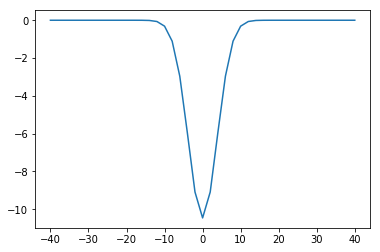

In [7]:
# plot results
fig=plt.figure()
#print('xs_pts: ', xs_pts)
#print('S: ', S*1000)
p1 = plt.plot(xs_pts, S*1000) 
#plt.xticks(y_pos+width, objects)  # ??
#plt.ylim((0,110))  # ??
##p2 = plt.plot(x_dir, a[2])
##p2 = plt.plot(x_dir, a[3])
##p3 = plt.plot(x_dir, a[4])
##plt.ylabel('Settlement [mm]', **axis_font)
##plt.xlabel('Distance from tunnel axis [m]', **axis_font)
##plt.yticks( **axis_font)
##plt.xticks( **axis_font)
####titleA=('Greenfield-Settlements, Station ' +str(align_data_df['Station'][i]))
##titleA=('Greenfield-Settlements, Station ' +str(a[5]))
##plt.title(titleA, **title_font)
#plt.legend()
plt.show()
#fig.savefig('C:\Users\kzq653\Documents\geopython\settlementtrough_bilder_test' + str(titleA) +'.png', dpi=300)